In [1]:
# Useful imports
import numpy as np
from matplotlib.pyplot import figure, show
from photutils import aperture as ap
from astropy.io import fits
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Sorts images by frame number

# path to reduced data
path = "/net/virgo01/data/users/mpucovsky/OAProject/2025-05-05/Reduced"
pathObj = Path(path)

frames = {}
for f in pathObj.iterdir():
    name = f.name
    if "Star" not in name and "Flat" not in name:
        hduList = fits.open(f)
        data = hduList[0].data
        frames[name] = data
        hduList.close()
        
orderedFrames = dict(sorted(frames.items()))


In [3]:
# Defines apertures and annuli

targetAp = ap.CircularAperture((651,602), 5)
targetAn = ap.CircularAnnulus((651,602), 7, 11)

check1Ap = ap.CircularAperture((663,641), 7)
check1An = ap.CircularAnnulus((663,641), 9, 15)

check2Ap = ap.CircularAperture((592,546), 6)
check2An = ap.CircularAnnulus((592,546), 7, 9)

In [4]:
# Finds counts for each star

def FindCounts(data):    
    # background for target
    tAnStats = ap.ApertureStats(data, targetAn)
    tBackground = tAnStats.median
    # counts for target
    tApStats = ap.ApertureStats(data, targetAp)
    tCounts = tApStats.sum - (tApStats.sum_aper_area.value*tBackground)
    
    # background for checking1
    c1AnStats = ap.ApertureStats(data, check1An)
    c1Background = c1AnStats.median
    # counts for checking1
    c1ApStats = ap.ApertureStats(data, check1Ap)
    c1Counts = c1ApStats.sum - (c1ApStats.sum_aper_area.value*c1Background)
    
    # background for checking2
    c2AnStats = ap.ApertureStats(data, check2An)
    c2Background = c2AnStats.median
    # counts for checking2
    c2ApStats = ap.ApertureStats(data, check2Ap)
    c2Counts = c2ApStats.sum - (c2ApStats.sum_aper_area.value*c2Background)
    
    return [tCounts, c1Counts, c2Counts]

# each contains tuples [target, checking1, checking2]
R = []
G = []
B = []
Lum = []

for file in orderedFrames:
    if "R" in file[8:]:
        R.append(FindCounts(orderedFrames[file]))
    if "G" in file[8:]:
        G.append(FindCounts(orderedFrames[file]))
    if "B" in file[8:]:
        B.append(FindCounts(orderedFrames[file]))
    if "Lum" in file[8:]:
        Lum.append(FindCounts(orderedFrames[file]))

In [16]:
# normalises counts using checking star 1

# each contains [normalised Target, normalised Checking 2]
normR = []
normG = []
normB = []
normLum = []
for i in range(0, len(R)):
    normR.append([R[i][0]/R[i][1],R[i][2]/R[i][1]])
    normG.append([G[i][0]/G[i][1],G[i][2]/G[i][1]])
    normB.append([B[i][0]/B[i][1],B[i][2]/B[i][1]])
    normLum.append([Lum[i][0]/Lum[i][1],Lum[i][2]/Lum[i][1]])
    

normRMedian = np.median(R[:][1])
normGMedian = np.median(G[:][1])
normBMedian = np.median(B[:][1])
normLumMedian = np.median(Lum[:][1])


for i in range(0, len(normR)):
    for n in range(0,2):
        normR[i][n] = normR[i][n]*normRMedian
        normG[i][n] = normG[i][n]*normGMedian
        normB[i][n] = normB[i][n]*normBMedian
        normLum[i][n] = normLum[i][n]*normLumMedian


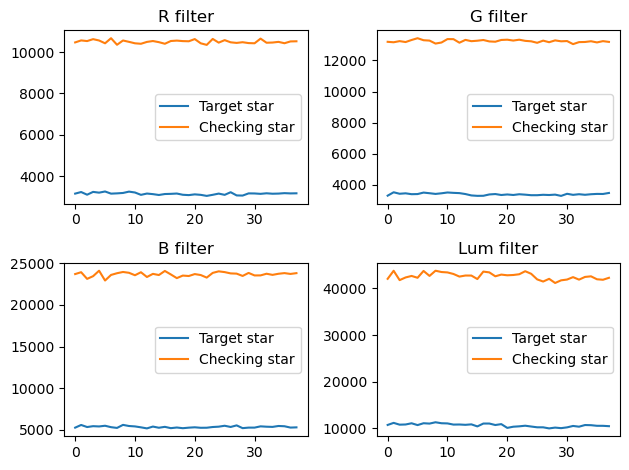

In [29]:
# displays normalised plot

fig = figure()
figAxes = fig.add_subplot(2,2,1)
figAxes.plot(normR)
figAxes.set_title("R filter")
figAxes.legend(["Target star", "Checking star"])

figAxes = fig.add_subplot(2,2,2)
figAxes.plot(normG)
figAxes.set_title("G filter")
figAxes.legend(["Target star", "Checking star"])

figAxes = fig.add_subplot(2,2,3)
figAxes.plot(normB)
figAxes.set_title("B filter")
figAxes.legend(["Target star", "Checking star"])

figAxes = fig.add_subplot(2,2,4)
figAxes.plot(normLum)
figAxes.set_title("Lum filter")
figAxes.legend(["Target star", "Checking star"])

fig.tight_layout()
show()

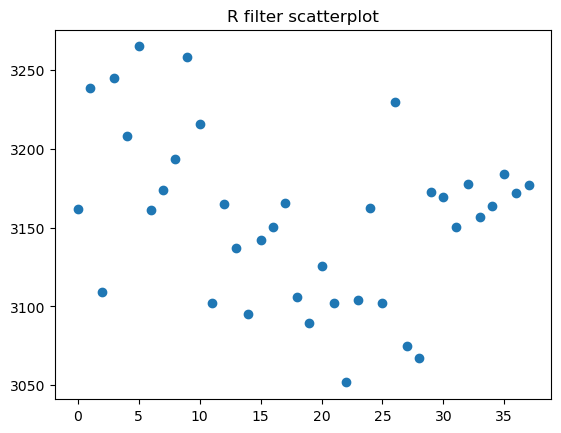

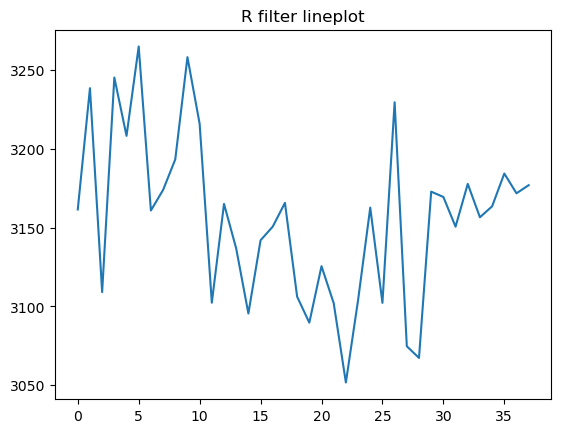

In [34]:
# displays normalised data for target star only, for R filter only
targetR = []
for i in range(0, len(normR)):
    targetR.append(normR[i][0])
    
fig = figure()
figAxes = fig.add_subplot(1,1,1)
figAxes.scatter(range(0, len(targetR)), targetR)
figAxes.set_title("R filter scatterplot")

fig = figure()
figAxes = fig.add_subplot(1,1,1)
figAxes.plot(targetR)
figAxes.set_title("R filter lineplot")

show()